# Tabla: ``g_address`` - Análisis Exploratorio de Datos (EDA)


Este Análisis Exploratorio se centra en un conjunto de registros de negocios. El objetivo del EDA es comprender la estructura y las relaciones dentro de estos datos, identificar patrones significativos y descubrir cualquier anomalía que pueda requerir atención adicional. 

Se analizará la distribución de los negocios por estado y ciudad, se identificarán las ciudades con mayor y menor concentración de negocios, se examinará la dispersión geográfica de los negocios utilizando coordenadas de latitud y longitud para detectar patrones geográficos significativos y outliers en los datos.

Luego se identificarán y manejarán los valores nulos, especialmente en la columna de códigos postales.

Todo ello, se realizará mediante la utilización de diversas visualizaciones como gráficos de barras, histogramas, gráficos de dispersión y mapas para ilustrar los hallazgos y facilitar la interpretación de los datos.

In [45]:
import pandas as pd
import os


In [46]:
# Se lee el archivo que tenemos de la tabla address
g_address = pd.read_parquet(r'C:\Users\debor\OneDrive\Documentos\Henry\PROYECTO FINAL local\Datasets\datasets_google\g_address_v3.parquet')

Inspección inicial de la tabla

In [47]:
# Se verifica el contenido de la tabla
g_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17376 entries, 0 to 17375
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_negocio  17376 non-null  object 
 1   direccion   17376 non-null  object 
 2   ciudad      17376 non-null  object 
 3   cod.postal  16465 non-null  object 
 4   estado      17376 non-null  object 
 5   id_estado   17376 non-null  int32  
 6   latitude    17376 non-null  float32
 7   longitude   17376 non-null  float32
dtypes: float32(2), int32(1), object(5)
memory usage: 882.5+ KB


In [48]:
# Se visualizan las primeras filas
print(g_address.head())

                              id_negocio               direccion  \
0  0x89c2f6163ac2864f:0xa4213a2f66c15d8f    5-11 Morningside Ave   
1   0x864c1f10c079a921:0x95710cd26231cc3    2601 Summit Ave #300   
2  0x88d9050582e1e64b:0x33457ba08c64df20   10225 Avenida Del Rio   
3  0x88e783a0a141ae61:0xc8892c7a3b97364b     13145 W Colonial Dr   
4  0x54cb90a9d85b5a37:0x2a6d31d462a28f2e         201 W Carlos St   

           ciudad cod.postal      estado  id_estado   latitude   longitude  
0        New York   NY 10026    New York         13  40.804184  -73.958702  
1           Plano   TX 75074       Texas          6  33.010319  -96.679756  
2    Delray Beach   FL 33446     Florida          5  26.435940  -80.207253  
3   Winter Garden   FL 34787     Florida          5  28.551163  -81.577202  
4         Alturas   CA 96101  California          2  41.481632 -120.543671  


In [49]:
# Se visualizan estadísticas descriptivas de las columnas numéricas
print(g_address.describe())

          id_estado      latitude     longitude
count  17376.000000  17376.000000  17376.000000
mean       6.482735     34.436203    -94.309410
std        4.147183      5.341632     18.059029
min        2.000000     24.545593   -124.237144
25%        2.000000     29.796927   -117.315483
50%        5.000000     33.970278    -94.046429
75%       12.000000     40.139939    -78.811327
max       13.000000     44.997814    -71.935623


Se modifican columnas para mayor uniformidad y entendimiento de la tabla

In [50]:
# Se renombran las columnas 'latitude' y 'longitude'
g_address = g_address.rename(columns={'latitude': 'latitud', 'longitude': 'longitud'})

In [51]:
# Se reordenan las columnas
nuevo_orden = ['id_negocio', 'id_estado', 'estado', 'direccion', 'ciudad', 'cod.postal', 'latitud', 'longitud']
g_address = g_address[nuevo_orden]

### Análisis de valores nulos

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


colors = ["#f8efd9", "#79b4b7", "#344643"]
cmap = ListedColormap(colors)

In [53]:
# Se cuentan los valores nulos por columna
print(g_address.isnull().sum())

id_negocio      0
id_estado       0
estado          0
direccion       0
ciudad          0
cod.postal    911
latitud         0
longitud        0
dtype: int64


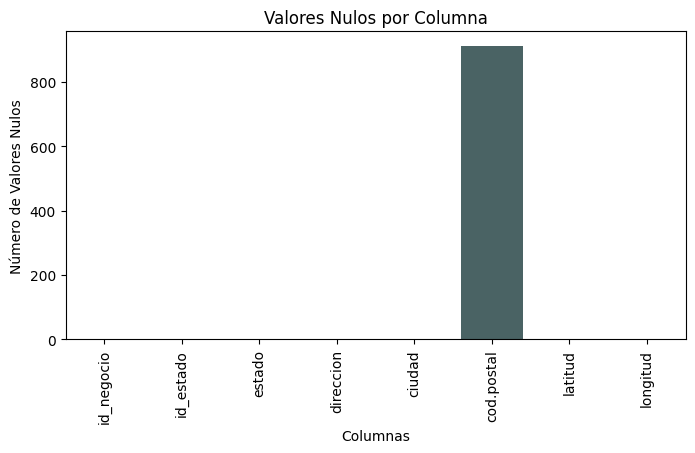

In [54]:
nulos_por_columna = g_address.isnull().sum()

colors = ["#f8efd9", "#e4dac0", "#c6b8a1", "#79b4b7", "#5f8a8f", "#466768", "#344643", "#211f1d"]

plt.figure(figsize=(8, 4))
sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values, hue=nulos_por_columna.index, palette=colors, legend=False)
plt.xticks(rotation=90)
plt.title('Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Nulos')
plt.show()

### Distribuciones y Visualizaciones

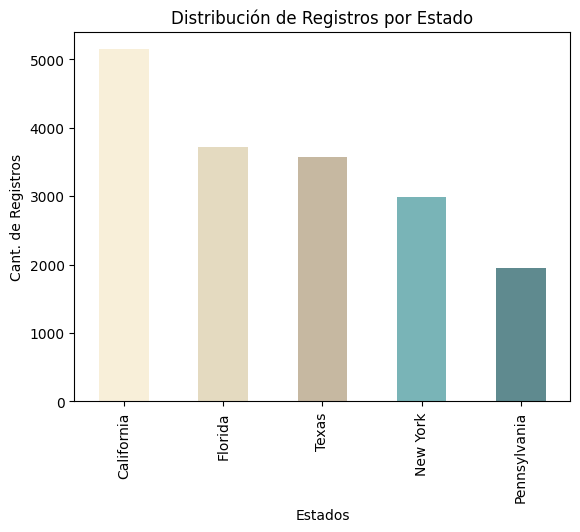

In [55]:
# Gráfico de barras para ver la distribución de los registros de cada estado
g_address['estado'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribución de Registros por Estado')
plt.xlabel('Estados')
plt.ylabel('Cant. de Registros')
plt.show()

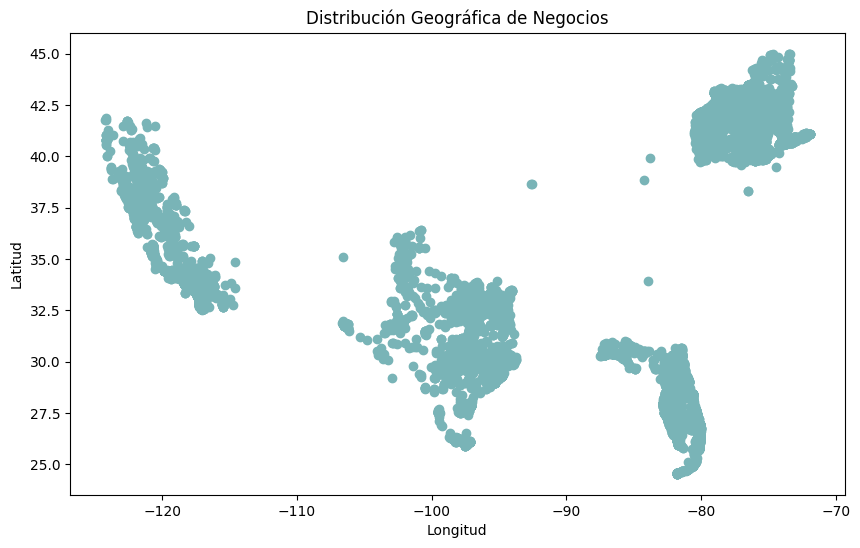

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(g_address['longitud'], g_address['latitud'], c='#79b4b7')
plt.title('Distribución Geográfica de Negocios')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

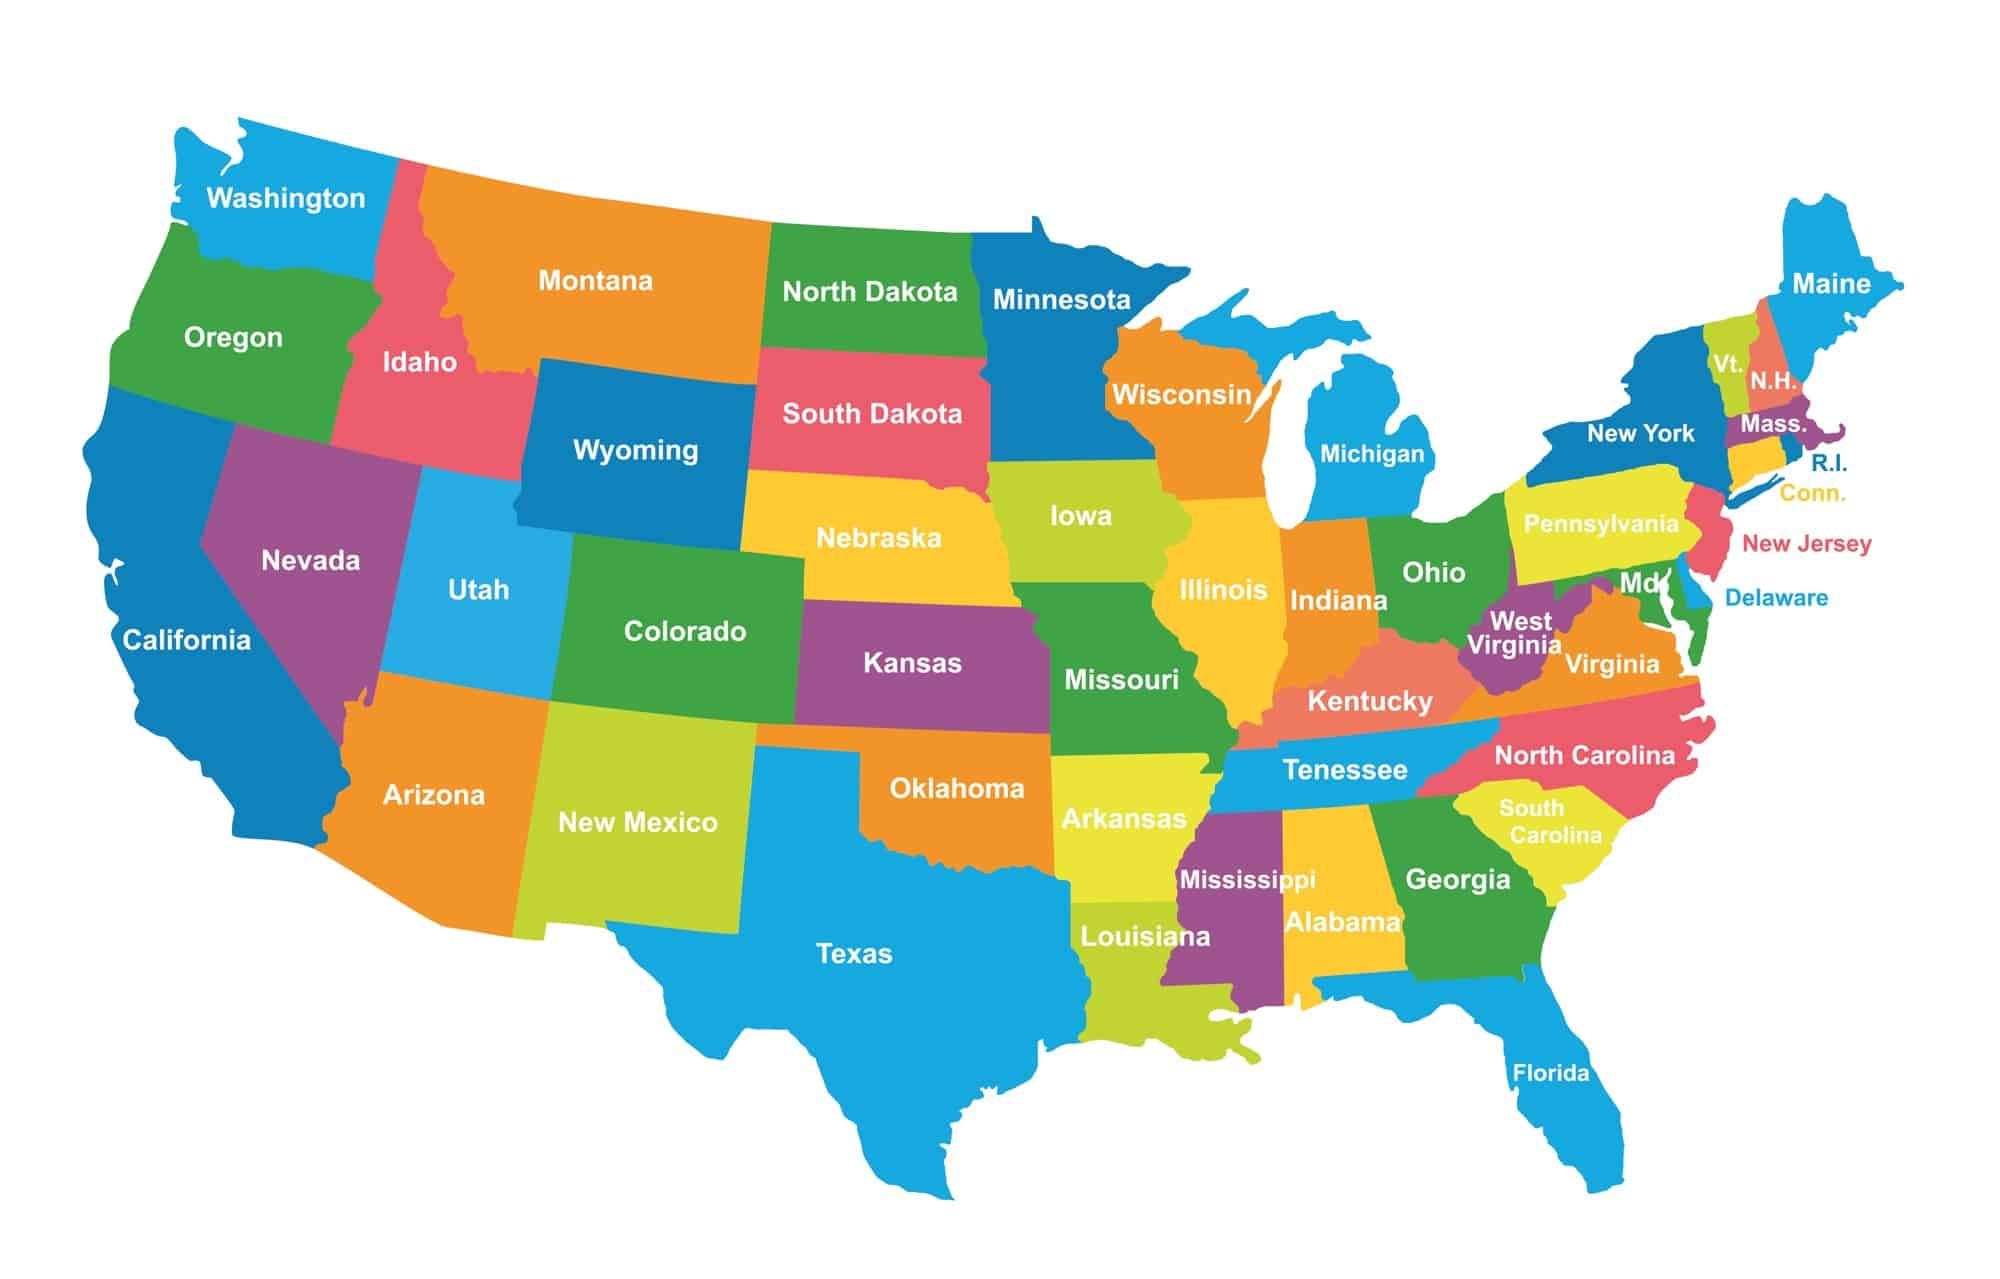

In [57]:
from IPython.display import Image
ruta_imagen = r"C:\Users\debor\OneDrive\Documentos\Henry\PROYECTO FINAL local\Images\mapa_USA.jpg"
Image(filename=ruta_imagen)

En el gráfico de arriba se puede ver la distribución de los negocios en lo que sería el mapa del territorio (según latitud y longitud). Si lo comparamos con el mapa político de abajo, se nota cómo claramente los mísmos estan bien distribuídos en el estado que corresponde, con la presencia de outliers insignificantes para el análisis.

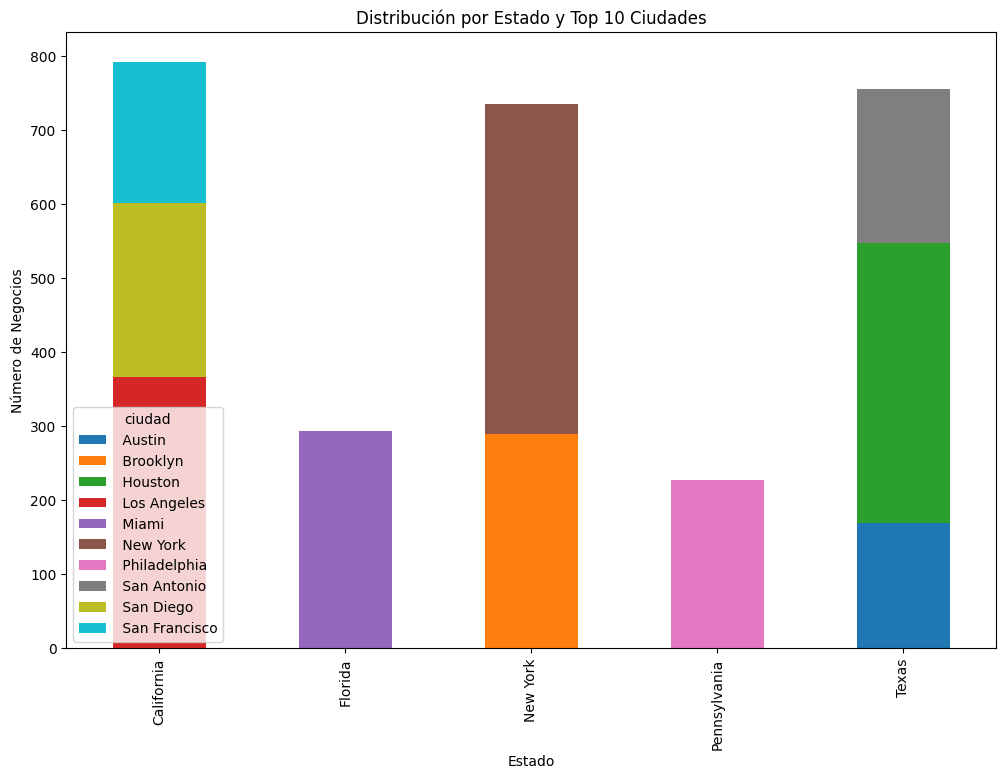

In [58]:
# Se agrupan y cuentan registros por estado y ciudad
ciudad_counts = g_address.groupby(['estado', 'ciudad']).size()

# Se selecciona el top 10 de ciudades con más registros
top10_ciudades = ciudad_counts.groupby('ciudad').sum().nlargest(10).index

# Se filtra el DataFrame original para incluir solo estas ciudades
top10_df = g_address[g_address['ciudad'].isin(top10_ciudades)]

top10_df.groupby(['estado', 'ciudad']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribución por Estado y Top 10 Ciudades')
plt.xlabel('Estado')
plt.ylabel('Número de Negocios')
plt.show()

Aquí arriba se pueden apreciar las 10 ciudades con mas restaurantes de los Estados Unidos, distribuidas a su vez por estados.

Limpiar Datos

In [59]:
# Rellenar valores nulos en 'cod.postal' 
g_address['cod.postal'] = g_address['cod.postal'].fillna('sin_dato')

In [60]:
g_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17376 entries, 0 to 17375
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_negocio  17376 non-null  object 
 1   id_estado   17376 non-null  int32  
 2   estado      17376 non-null  object 
 3   direccion   17376 non-null  object 
 4   ciudad      17376 non-null  object 
 5   cod.postal  17376 non-null  object 
 6   latitud     17376 non-null  float32
 7   longitud    17376 non-null  float32
dtypes: float32(2), int32(1), object(5)
memory usage: 882.5+ KB


Guardar el DataFrame Limpio

In [61]:
# Se guarda el DataFrame limpio en un nuevo archivo Parquet
g_address.to_parquet(r'C:\Users\debor\OneDrive\Documentos\Henry\PROYECTO FINAL local\EDA\address_cleaned.parquet', index=False)